In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

In [2]:
DATADIR = "dataset2"
CATEGORIES = ["AIHOLE", "BILLESHWAR_TEMPLE", "CHENNAKESHWARA_TEMPLE", "HAMPI_CHARIOT", "IBRAHIM_ROZA", "JAIN_BASADI", "KAMAL_BASTI", "KEDARESHWARA_TEMPLE", "KESHAVA_TEMPLE", "LOTUS_MAHAL"]

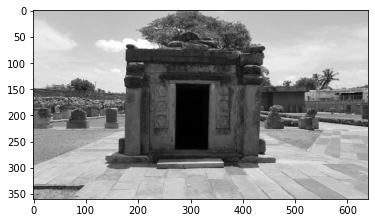

In [3]:
for category in CATEGORIES: 
    path = os.path.join(DATADIR,category) 
    for img in os.listdir(path):  
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert image to array
        plt.imshow(img_array, cmap='gray')  # ploting the image it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [4]:
print(img_array)

[[193 193 193 ... 185 185 184]
 [192 192 192 ... 185 185 185]
 [193 193 193 ... 185 185 185]
 ...
 [161 128 133 ... 200 199 195]
 [133 143 149 ... 191 197 198]
 [137 164 142 ... 188 191 191]]


In [5]:
print(img_array.shape)

(360, 640)


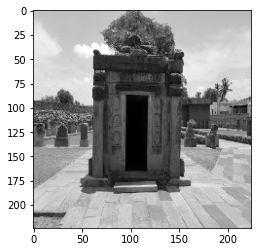

In [6]:
IMG_SIZE = 224

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [7]:
training_data = []

def create_dataset():
    for category in CATEGORIES:  

        path = os.path.join(DATADIR,category)  # create path to ajay, ashwini, kushagra, pragathi and lavanya
        class_num = CATEGORIES.index(category)  # get the classification  (0, 1, 2, 3, 4). 0=ajay 1=ashw 2=kush 3=prag 4=lava
        print(class_num)
        for img in tqdm(os.listdir(path)):  # iterate over each image per ajay, ashwini, kushagra, pragathi and lavanya
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass

In [8]:
create_dataset()

0


100%|██████████████████████████████████████████████████████████████████████████████████| 60/60 [00:00<00:00, 78.61it/s]


1


100%|██████████████████████████████████████████████████████████████████████████████████| 61/61 [00:01<00:00, 50.70it/s]


2


100%|██████████████████████████████████████████████████████████████████████████████████| 60/60 [00:00<00:00, 64.38it/s]


3


100%|██████████████████████████████████████████████████████████████████████████████████| 60/60 [00:06<00:00,  9.91it/s]


4


100%|█████████████████████████████████████████████████████████████████████████████████| 60/60 [00:00<00:00, 126.68it/s]


5


100%|██████████████████████████████████████████████████████████████████████████████████| 60/60 [00:00<00:00, 78.23it/s]


6


100%|█████████████████████████████████████████████████████████████████████████████████| 60/60 [00:00<00:00, 146.10it/s]


7


100%|██████████████████████████████████████████████████████████████████████████████████| 60/60 [00:00<00:00, 79.84it/s]


8


100%|██████████████████████████████████████████████████████████████████████████████████| 60/60 [00:01<00:00, 52.07it/s]


9


100%|██████████████████████████████████████████████████████████████████████████████████| 60/60 [00:00<00:00, 63.10it/s]


In [9]:
print(len(training_data))

601


In [10]:
import random

random.shuffle(training_data)

In [11]:
for sample in training_data[:20]:
    print(sample[1])

1
8
2
3
1
6
5
2
6
3
9
3
7
1
9
1
9
0
5
7


In [12]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

# converting the X and y to numpy array

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)

[[[[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  ...

  [[115]
   [115]
   [114]
   ...
   [249]
   [244]
   [246]]

  [[115]
   [112]
   [115]
   ...
   [250]
   [250]
   [248]]

  [[117]
   [115]
   [120]
   ...
   [244]
   [245]
   [245]]]]


In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [14]:
X = X/255.0 

In [15]:
model = Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=X.shape[1:]))

model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(128,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(256,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(512,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.1))

model.add(Flatten())

model.add(Dense(512))
model.add(Activation('relu'))

model.add(Dense(10, activation='softmax'))

model.compile(
              loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [16]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target = train_test_split(
                                                 X,                                                
                                                 y,
                                                 test_size = 0.1
                                             )

In [17]:
history = model.fit(
    X, y, batch_size=32, epochs=11,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ], validation_split=0.3
)

Epoch 1/11
14/14 [==============================] - 70s 5s/step - loss: 3.7137 - accuracy: 0.1190 - val_loss: 2.2968 - val_accuracy: 0.0884
Epoch 2/11
14/14 [==============================] - 66s 5s/step - loss: 2.2401 - accuracy: 0.2024 - val_loss: 2.0908 - val_accuracy: 0.1934
Epoch 3/11
14/14 [==============================] - 64s 5s/step - loss: 1.6815 - accuracy: 0.4214 - val_loss: 1.5420 - val_accuracy: 0.4696
Epoch 4/11
14/14 [==============================] - 65s 5s/step - loss: 1.2778 - accuracy: 0.6095 - val_loss: 1.7083 - val_accuracy: 0.5304
Epoch 5/11
14/14 [==============================] - 64s 5s/step - loss: 0.9303 - accuracy: 0.7143 - val_loss: 1.0262 - val_accuracy: 0.6740
Epoch 6/11
14/14 [==============================] - 65s 5s/step - loss: 0.5721 - accuracy: 0.8310 - val_loss: 1.1887 - val_accuracy: 0.6188
Epoch 7/11
14/14 [==============================] - 64s 5s/step - loss: 0.4330 - accuracy: 0.8548 - val_loss: 0.9470 - val_accuracy: 0.7017
Epoch 8/11
14/14 [==

In [18]:
print(model.evaluate(test_data,test_target))

2/2 [==============================] - 1s 673ms/step - loss: 0.3662 - accuracy: 0.9016
[0.36617740988731384, 0.9016393423080444]


In [19]:
CATEGORIES = ["AIHOLE", "BILLESHWAR_TEMPLE", "CHENNAKESHWARA_TEMPLE", "HAMPI_CHARIOT", "IBRAHIM_ROZA", "JAIN_BASADI", "KAMAL_BASTI", "KEDARESHWARA_TEMPLE", "KESHAVA_TEMPLE", "LOTUS_MAHAL"]

def prepare(filepath):
    IMG_SIZE = 224                                           # image size of 224 of the prediction img
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)   # read in the image, convert to grayscale
    plt.imshow(img_array, cmap='gray')                       # ploting the image 
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize image to match models expected sizing
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)  

1/1 [==============================] - 0s 129ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


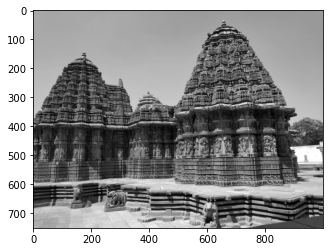

In [31]:
prediction = model.predict([prepare('kesh.jpg')])
print(prediction)

1/1 [==============================] - 0s 60ms/step
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


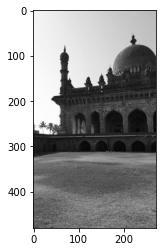

In [21]:
prediction = model.predict([prepare('roza.jpg')])
print(prediction)

1/1 [==============================] - 0s 74ms/step
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


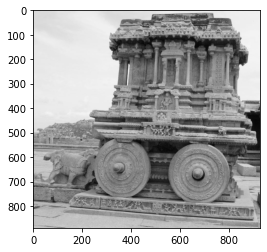

In [22]:
prediction = model.predict([prepare('chariot.jpg')])
print(prediction)

1/1 [==============================] - 0s 128ms/step
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


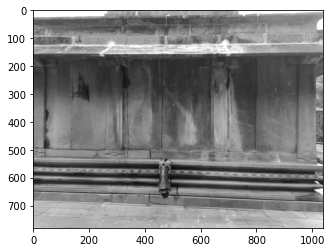

In [30]:
prediction = model.predict([prepare('jain.jpg')])
print(prediction)